# Machine Learning Term Project: Seoul Public Bike Demand Prediction Model

Name: Gwendelyn Wong Rhien Yhung

Student ID: 2022250030

# Phase 1

## 1. Data Selection

### 1.1 Goal

The goal of this project is to implement a machine learning model that can predict the demand for rental bicycles in Seoul based on various factors. This is important to overcome the rebalancing issue of the number of bicycles, hence providing the appropriate number of bicycles based on the demand at any certain time.

### 1.2 Dataset

The issues faced in this domain is that there is a lack of understanding and analysis in the relationship between rental bicycle demand and the various factors that influence it, such as environmental factors, geographical factors and temporal factors.

Hence, the dataset that can be used for this field of interest is the Seoul Bike Sharing Demand dataset (https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand). This dataset contains hourly public bicycle rental counts obtained from the Seoul Bike Sharing System, with the corresponding weather and holiday information. This dataset contains 8760 instances and 13 features.


## 2. Problem Identification

Machine learning models can be used to overcome the problems stated in the objective by:

(i) Accurately predicting bike demand


The model can reliably forecast the hourly bike rentals to meet user demands, avoid bikes shortages, and avoid excess availability. Regression models can be trained to predict the rented bike count based on weather conditions, time of day, seasons, and other factors.


(ii) Optimizing resources

The prediction from the model can  forecast demand in specific areas to allow efficient bike redistribution. If given location data, clustering algorithms can also be used to identify high-demand zones. As a result, this can help operators reduce costs and improve resource allocation.


(iii) Scenario planning

The model can help predict the demand of bikes under hypothetical scenarios, such as during a festival or sudden weather change. For example, when planning for festivals at Han River or heavy rain minimizes disruptions and ensures sufficient capacity.

(iv) Improving customer experience

The prediction model may integrate demand prediction with user apps to suggest nearby bikes or recommend alternate locations based on the real-time availability. Hence, this can enchance user experience with minimal waiting time and easy bike availability, which in return will encourage more users to adopt the service.

"A rule-based model for Seoul Bike sharing demand prediction using weather data" by Sathishkumar V E & Yongyun Cho explored rule-based predictive models (CUBIST, regularized random forest, CART, KNN, and CIT) for predicting bike rental demands, and was used as reference when completing this project.

The task of predicting rental bike demand can be considered as a regression task, which is a supervised learning task. This is because the model will be trained on labeled data, where the input features (various factors) are paired with corresponding output labels (rental bike counts).

The evaluation metrics chosen to evaluate the performance of the model are:

(i) Root Mean Squared
Error (RMSE)

RMSE measures the average square-root of the errors. RMSE is a scale-dependent evaluation mettric, and it produces values of the same order of measurement. RMSE emphasizes large errors by squaring them, hence this will be useful in identifying periods of high-demand for bike rentals. The formula for RMSE is as follows:

$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$

Where:
- $ n $ is the number of data points.
- $ y_i $ is the actual value for the $ i $-th data point.
- $\hat{y}_i$ the predicted value for the $ i $-th data point.

(ii) Mean Absolute Error (MAE)

MAE measures the average of the errors. It is used to evaluate the acuteness in prediction, and is also a scale-dependent metric. MAE treats all errors equally, hence it is less sensitive to outliers. This metric will be useful for the prediction of the general demand of bikes. MAE complements RMSE as RMSE will focus on large errors, while MAE will provide a more balanced average error measure. The formula for MAE is as follows:

$
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$

Where:
- $ n $ is the number of data points.
- $ y_i $ is the actual value for the $ i $-th data point.
- $ \hat{y}_i $ is the predicted value for the $ i $-th data point.

(iii) R-Squared ($R^2$)

Also known as the coefficient of determination, it ranges from values of 0 to 1. $R^2$ denotes the goodness of the fit of the prediction model. For example, a high value of $R^2$ close to 1 implies that the predicted values fit the observed values exactly. $R^2$ measures the proportion of variance in bike rental demand that can be explained by the features, such as weather, time, holidays,a nd etc. Since $R^2$ does not directly measure prediction error, it complements RMSE and MAE well. The formula for $R^2$ is as follows:

$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

Where:
- $ n $ is the number of data points.
- $ y_i $ is the actual value for the $ i $-th data point.
- $ \hat{y}_i $ is the predicted value for the $ i $-th data point.
- $ \bar{y} $ is the mean of the actual values.

# Phase 2

## 3. Exploratory Data Analysis (EDA)

### 3.1 Feature Description

The dependencies and required packages are first installed and imported. The dataset is then fetched from the UC Irvine Machine Learning Repository.

In [ ]:
!pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [ ]:
# Set configurations for randomness, plot appearance, and numerical formatting
np.random.seed(42)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
np.set_printoptions(precision=2, suppress=True)

In [ ]:
# Fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

In [ ]:
# Identify structure and keys of dataset

print(type(seoul_bike_sharing_demand))
print(seoul_bike_sharing_demand.keys())

<class 'ucimlrepo.dotdict.dotdict'>
dict_keys(['data', 'metadata', 'variables'])


In [ ]:
# Identify keys within 'data'

print(seoul_bike_sharing_demand.data.keys())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [ ]:
# Print number of instances

print(len(seoul_bike_sharing_demand.data['features']))

8760


The number of instances is equal to the count of bike demand for each hour for the consecutive period of 365 days. (24 * 365 = 8760)

In [ ]:
# Identify variable information

print(seoul_bike_sharing_demand.variables)

                     name     role         type demographic description  \
0                    Date  Feature         Date        None        None   
1       Rented Bike Count  Feature      Integer        None        None   
2                    Hour  Feature      Integer        None        None   
3             Temperature  Feature   Continuous        None        None   
4                Humidity  Feature      Integer        None        None   
5              Wind speed  Feature   Continuous        None        None   
6              Visibility  Feature      Integer        None        None   
7   Dew point temperature  Feature   Continuous        None        None   
8         Solar Radiation  Feature   Continuous        None        None   
9                Rainfall  Feature      Integer        None        None   
10               Snowfall  Feature      Integer        None        None   
11                Seasons  Feature  Categorical        None        None   
12                Holiday

In [ ]:
# Identify metadata

print(seoul_bike_sharing_demand.metadata)

{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

### 3.2 Feature Analysis

In [ ]:
# Make a copy of dataset, identify type & keys

new_dataset = seoul_bike_sharing_demand.copy()
print(type(new_dataset))
print(new_dataset.keys())

<class 'dict'>
dict_keys(['data', 'metadata', 'variables'])


In [ ]:
data = new_dataset['data']
variables = new_dataset['variables']
metadata = new_dataset['metadata']

print(data.keys())
print(variables.keys())

dict_keys(['ids', 'features', 'targets', 'original', 'headers'])
Index(['name', 'role', 'type', 'demographic', 'description', 'units',
       'missing_values'],
      dtype='object')


In [ ]:
data['features'].head()

Date  Rented Bike Count  Hour  Temperature  Humidity  Wind speed  \
0  1/12/2017                254     0         -5.2        37         2.2   
1  1/12/2017                204     1         -5.5        38         0.8   
2  1/12/2017                173     2         -6.0        39         1.0   
3  1/12/2017                107     3         -6.2        40         0.9   
4  1/12/2017                 78     4         -6.0        36         2.3   

   Visibility  Dew point temperature  Solar Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday  
0  Winter  No Holiday  
1  Winter  No Holiday  
2  Winter  No Holiday  
3  Winter  No Holiday  
4  Winter  No Holiday

In [ ]:
data['targets'].head()

Functioning Day
0             Yes
1             Yes
2             Yes
3             Yes
4             Yes

It can be seen above that the target variable in the dataset is currently `Functioning Day`. Since the goal is to predict rented bike count, the target variable is changed to `Rented Bike Count`.

In [ ]:
# Change target variable from Functioning Day to Rented Bike Count

variables.loc[variables['name'] == 'Rented Bike Count', 'role'] = 'Target'
variables.loc[variables['name'] == 'Functioning Day', 'role'] = 'Feature'

temp = data['targets']
data['targets'] = data['features']['Rented Bike Count']
data['features'] = data['features'].drop(columns=['Rented Bike Count'])
data['features']['Functioning Day'] = temp

In [ ]:
# Split features and targets columns

X = data['features']
y = data['targets']

In [ ]:
X.head()

Date  Hour  Temperature  Humidity  Wind speed  Visibility  \
0  1/12/2017     0         -5.2        37         2.2        2000   
1  1/12/2017     1         -5.5        38         0.8        2000   
2  1/12/2017     2         -6.0        39         1.0        2000   
3  1/12/2017     3         -6.2        40         0.9        2000   
4  1/12/2017     4         -6.0        36         2.3        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day  
0  No Holiday             Yes  
1  No Holiday             Yes  
2  No Holiday             Yes  
3  No Holiday             Yes  
4  No Holiday             Yes

In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [ ]:
# Separate numerical and categorical columns

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: Index(['Hour', 'Temperature', 'Humidity', 'Wind speed', 'Visibility',
       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall'],
      dtype='object')
Categorical Features: Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')


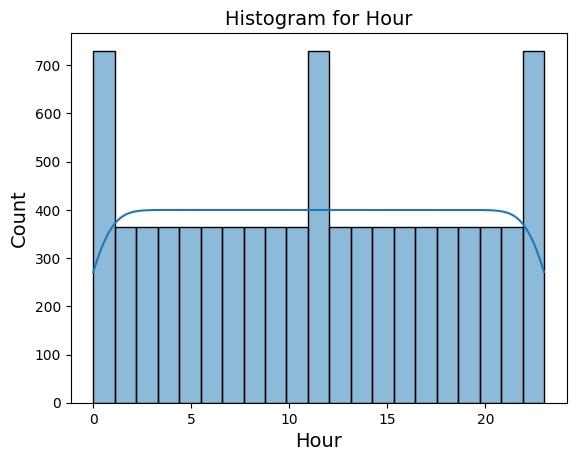

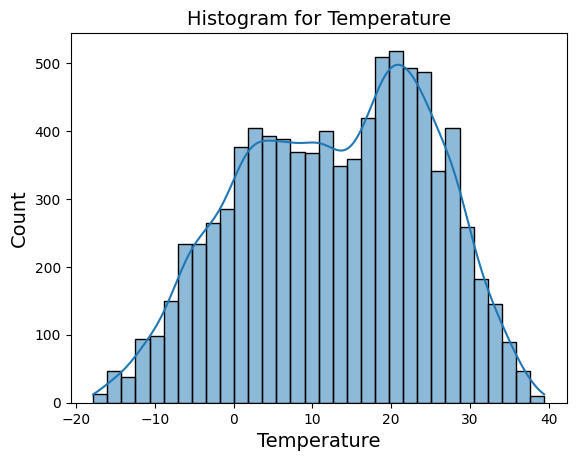

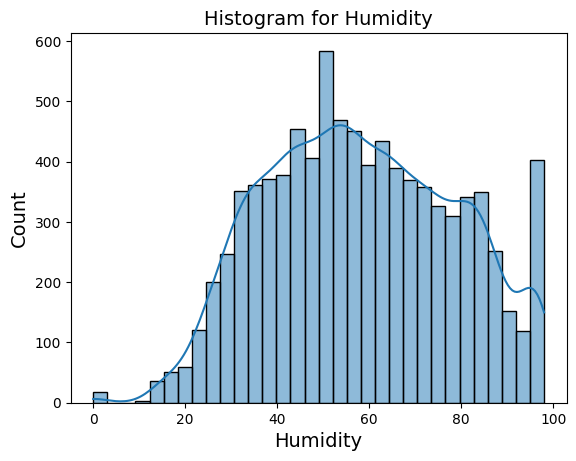

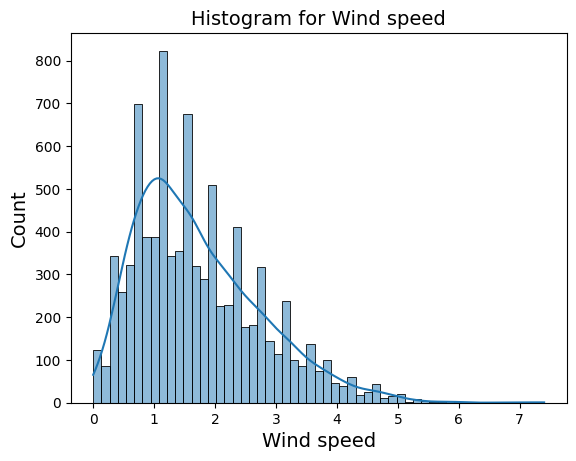

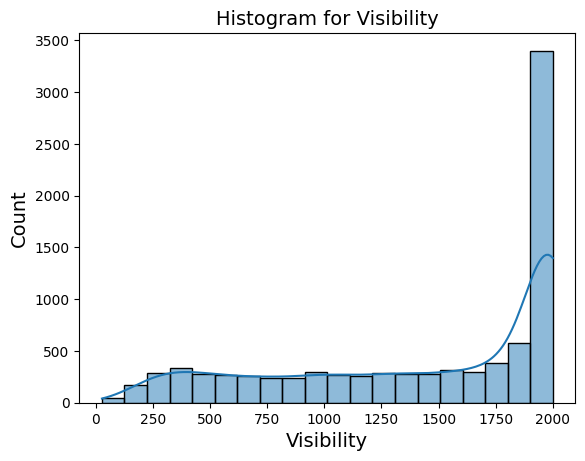

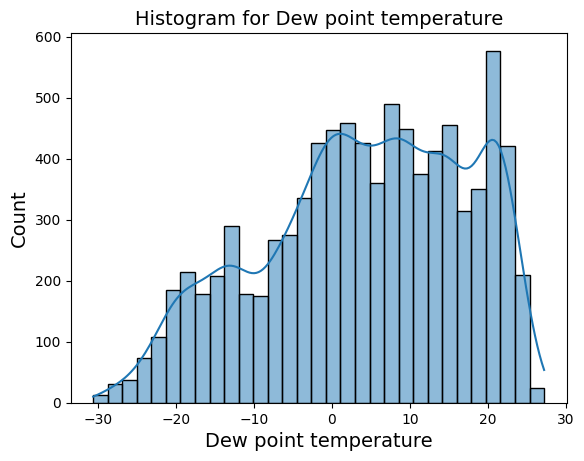

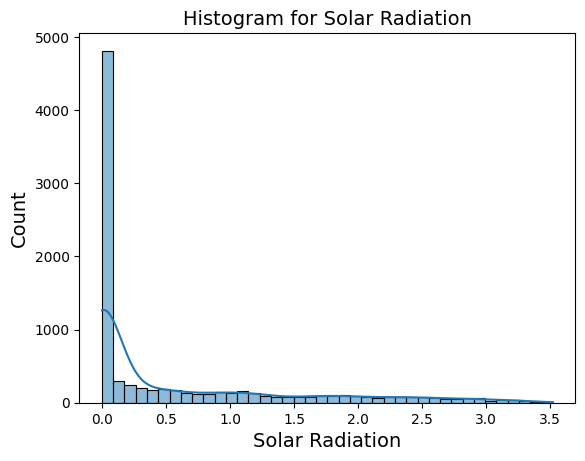

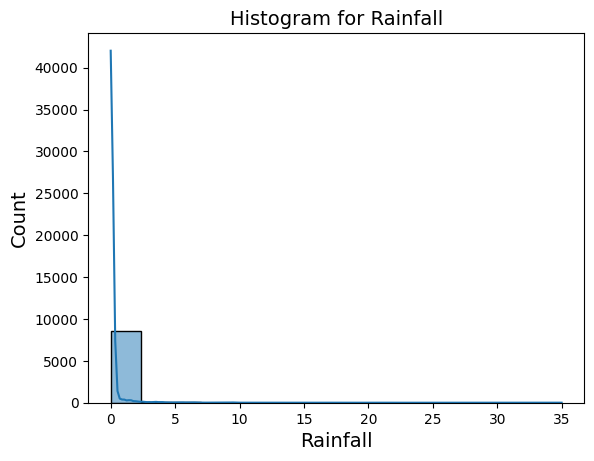

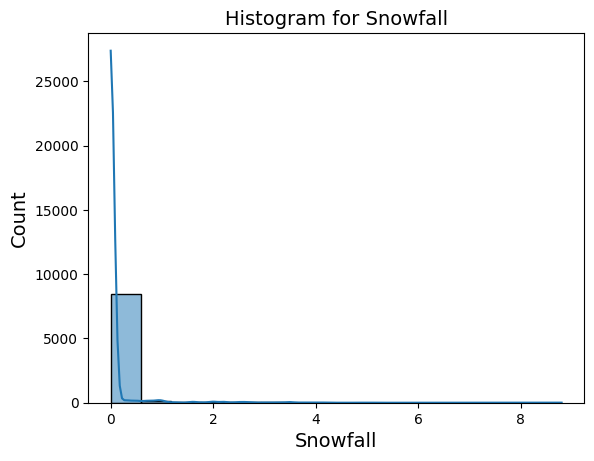

In [ ]:
# Visualize numerical features

for col in numerical_features:
    sns.histplot(X[col], kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

It can be seen that features such as `Rainfall` and `Snowfall` have mostly very small values, indicating the rareness of the occurence of rain and snow.

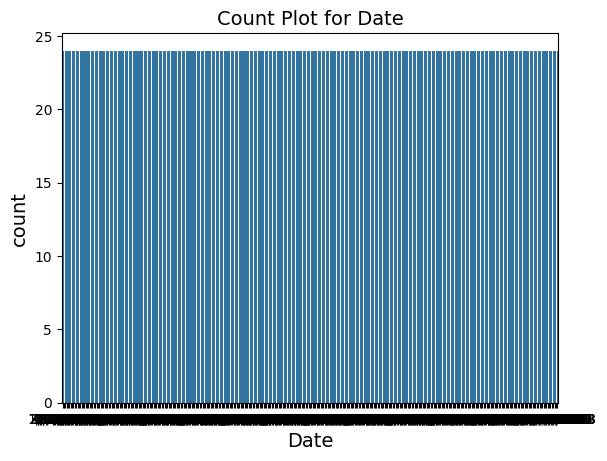

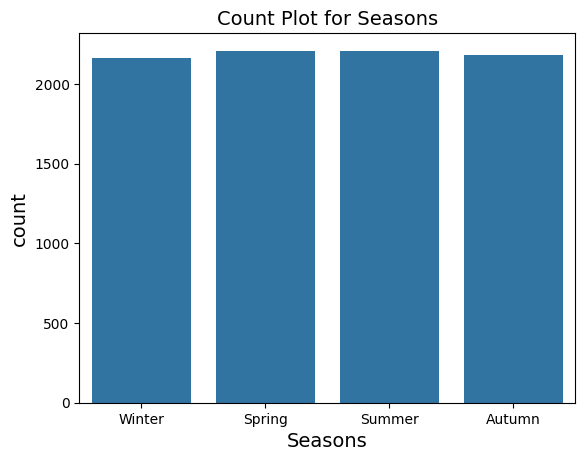

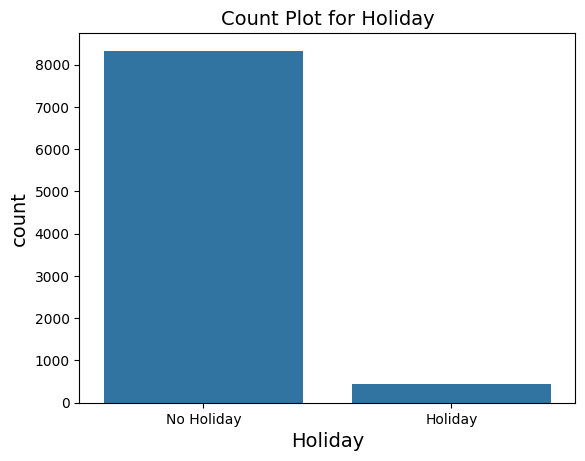

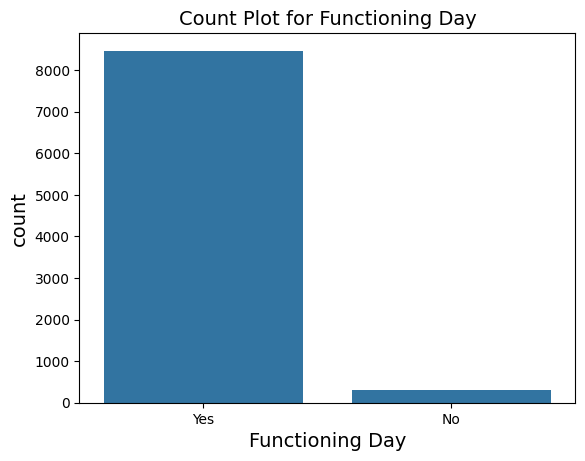

In [ ]:
# Visualize categorical features

for col in categorical_features:
    sns.countplot(x=X[col])
    plt.title(f"Count Plot for {col}")
    plt.show()

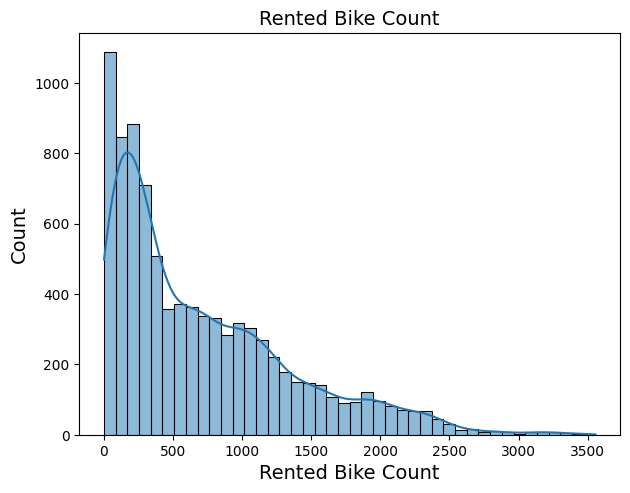

In [ ]:
# Visualize target variable

sns.histplot(y, kde=True)
plt.tight_layout()
plt.title('Rented Bike Count')
plt.show()

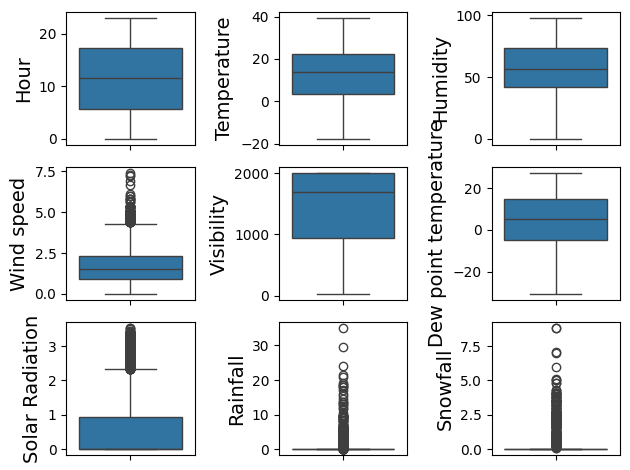

In [ ]:
# Boxplot for numerical features

plt.figure()
plt.subplot(3,3,1)
sns.boxplot(X['Hour'])
plt.subplot(3,3,2)
sns.boxplot(X['Temperature'])
plt.subplot(3,3,3)
sns.boxplot(X['Humidity'])
plt.tight_layout()
plt.subplot(3,3,4)
sns.boxplot(X['Wind speed'])
plt.tight_layout()
plt.subplot(3,3,5)
sns.boxplot(X['Visibility'])
plt.tight_layout()
plt.subplot(3,3,6)
sns.boxplot(X['Dew point temperature'])
plt.tight_layout()
plt.subplot(3,3,7)
sns.boxplot(X['Solar Radiation'])
plt.tight_layout()
plt.subplot(3,3,8)
sns.boxplot(X['Rainfall'])
plt.tight_layout()
plt.subplot(3,3,9)
sns.boxplot(X['Snowfall'])
plt.tight_layout()
plt.show()

The outlier data displayed above will be kept as it may represent rare natural events such as weather irregularities or festivals.

In [ ]:
# Feature-feature (numerical) relationship analysis

data_with_target = pd.concat([X, y], axis=1)
corr_matrix = data_with_target.corr(numeric_only=True)
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count        1.000000
Temperature              0.538558
Hour                     0.410257
Dew point temperature    0.379788
Solar Radiation          0.261837
Visibility               0.199280
Wind speed               0.121108
Rainfall                -0.123074
Snowfall                -0.141804
Humidity                -0.199780
Name: Rented Bike Count, dtype: float64

From the correlation matrix above, it can be seen that the target variable has the highest positive  linear correlation with `Temperature` and highest negative linear correlation with `Humidity`. This means that rental bike users are likely to rent bikes when the temperature is warm and when the humidity levels are low. However, this only displays the linear relationship, which is insufficient. Further analysis methods will be needed for accurate prediction.

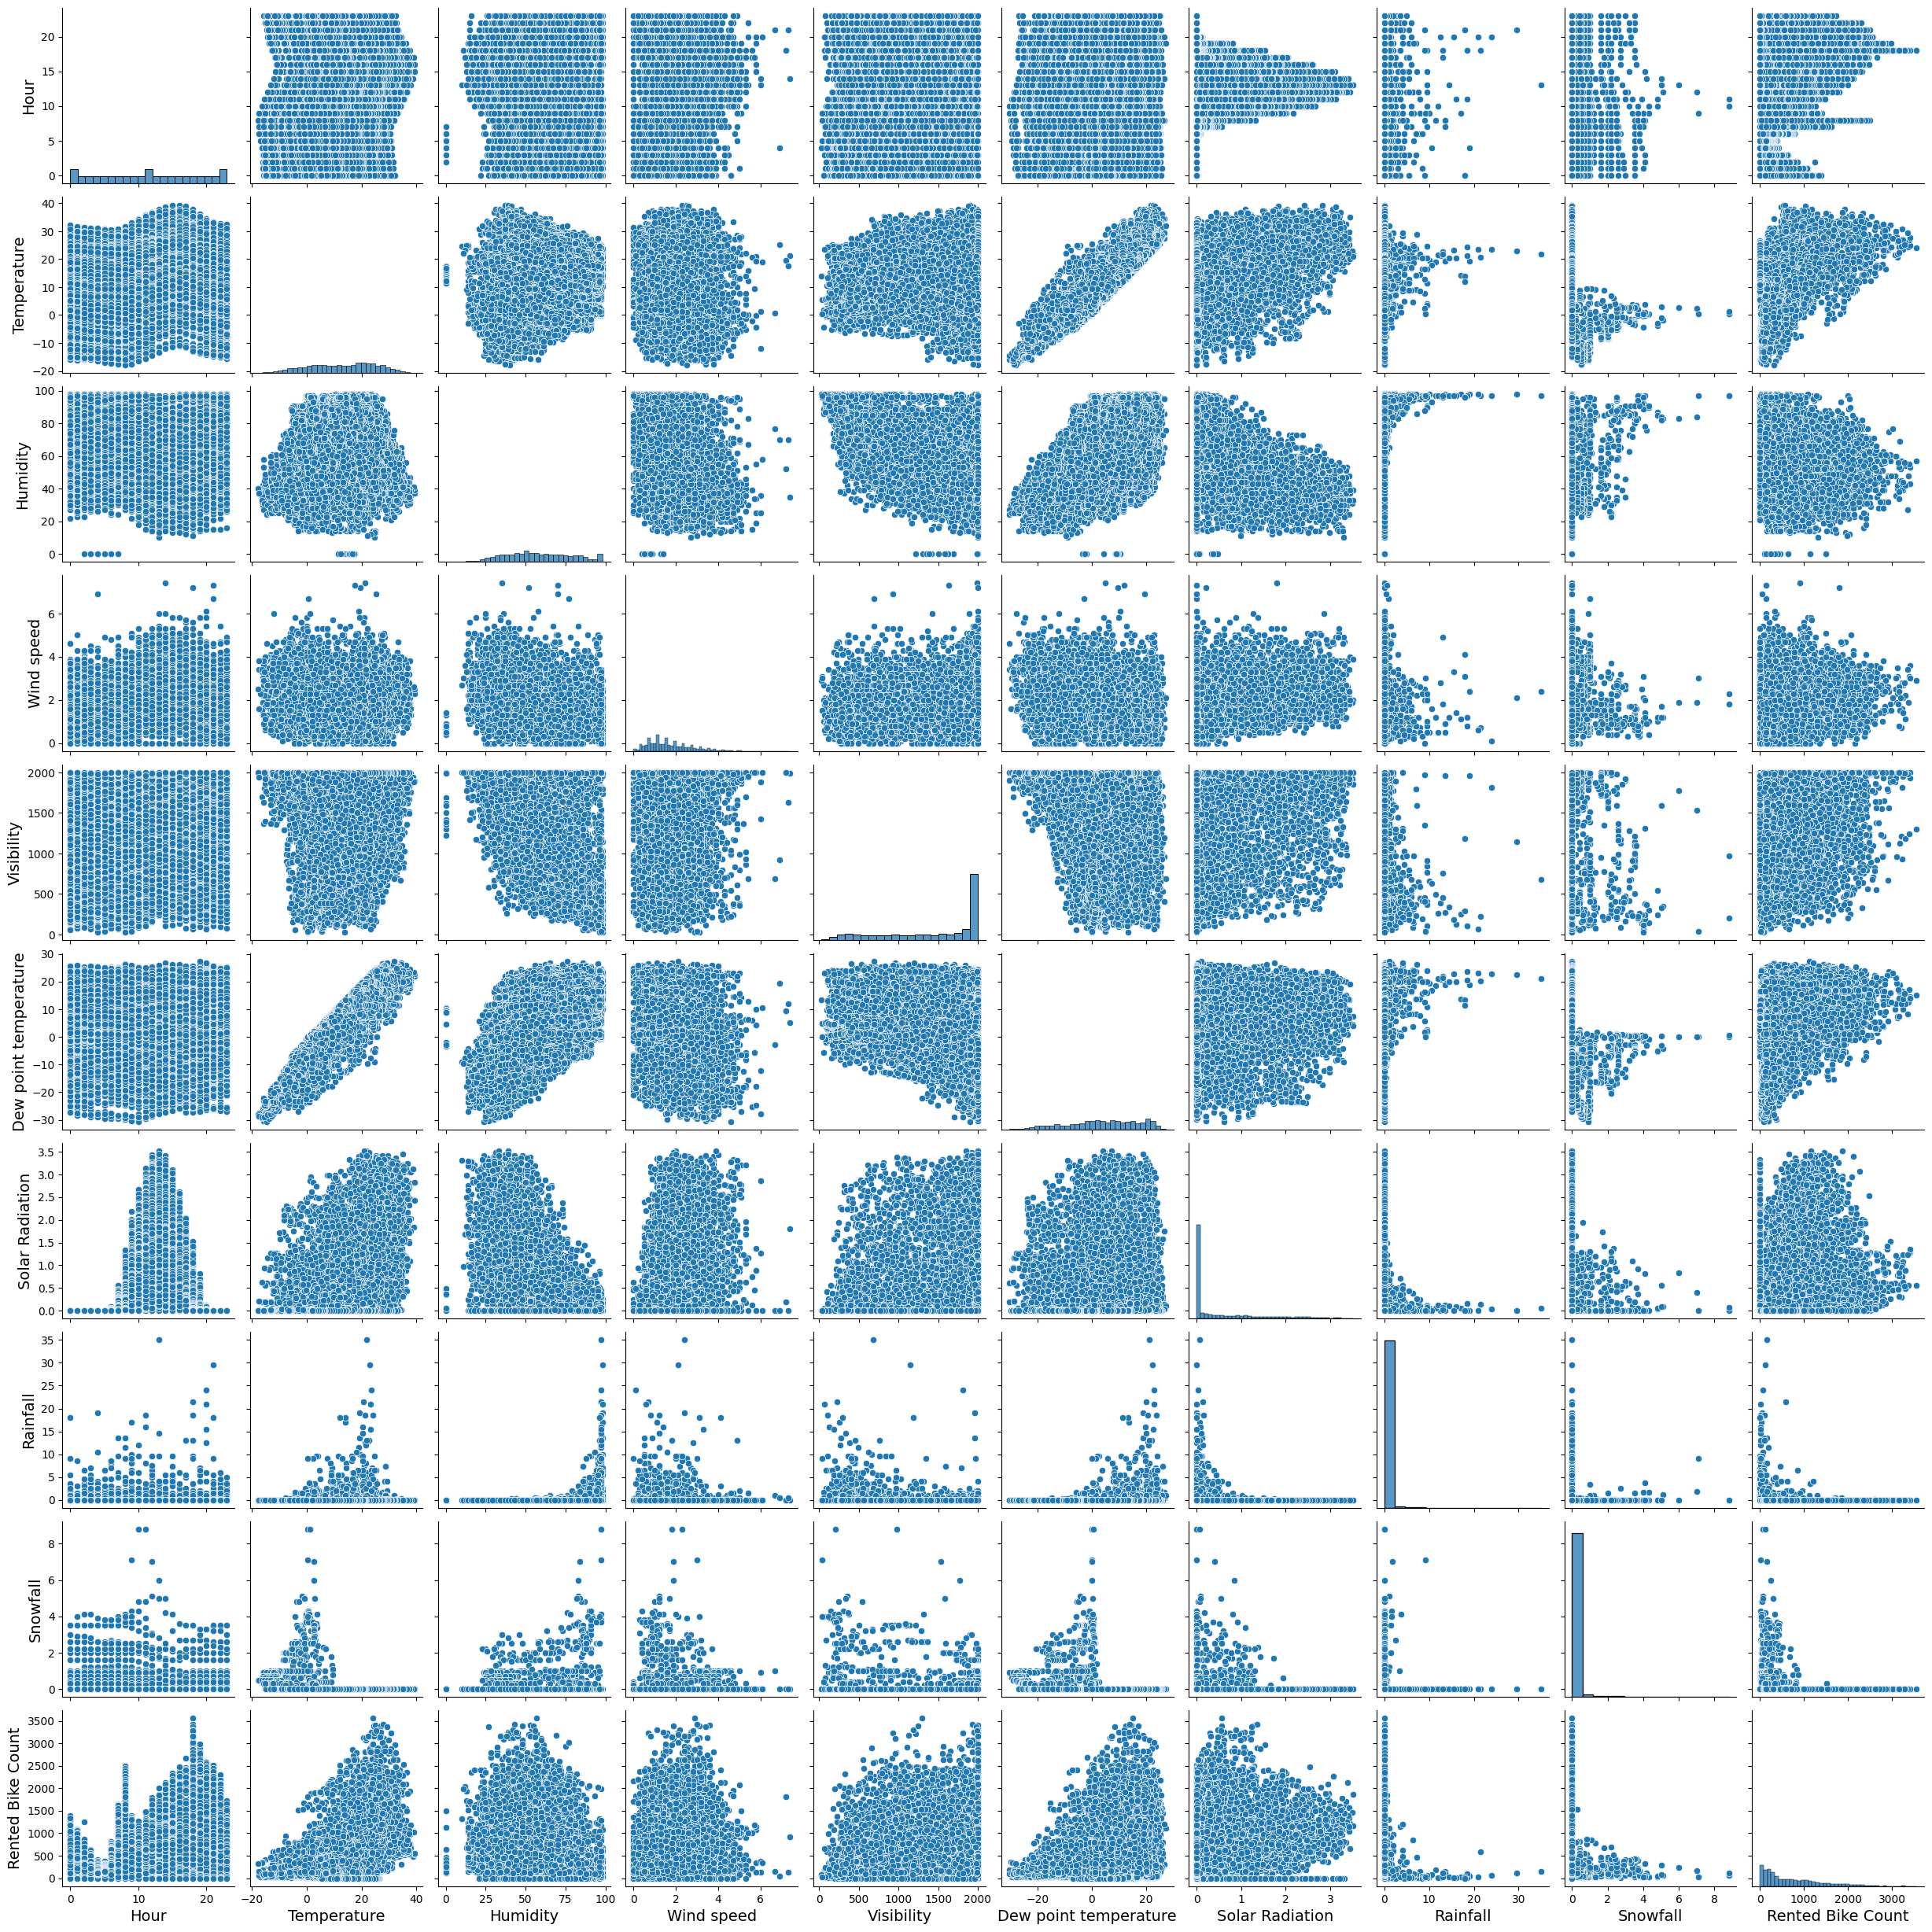

In [ ]:
sns.pairplot(data_with_target)
#sns.pairplot(X)
plt.show()

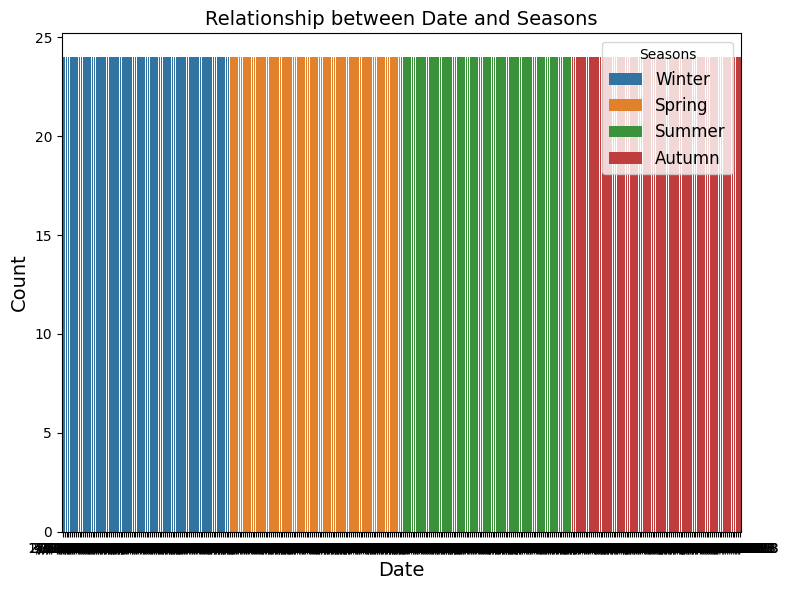

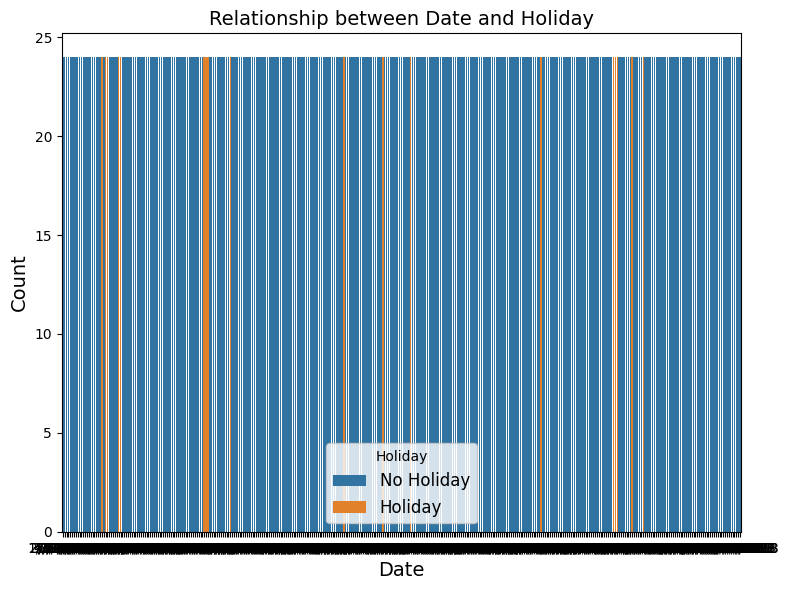

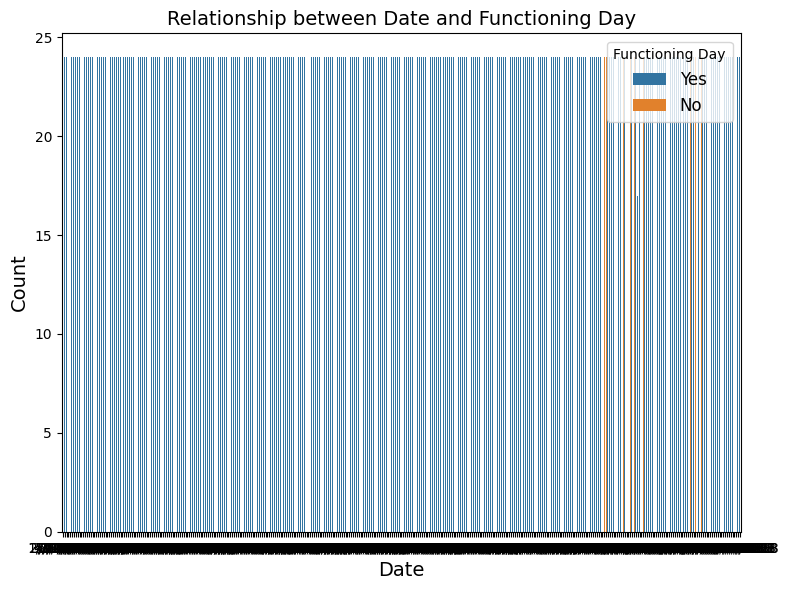

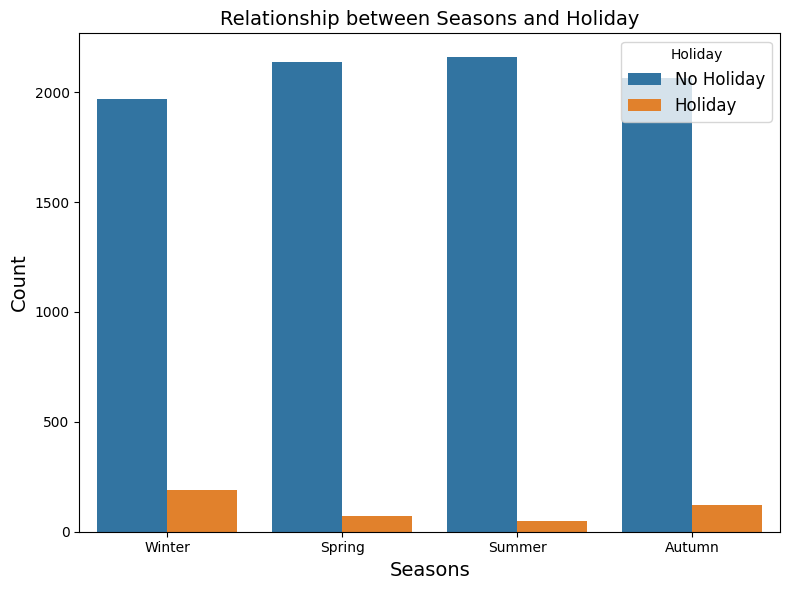

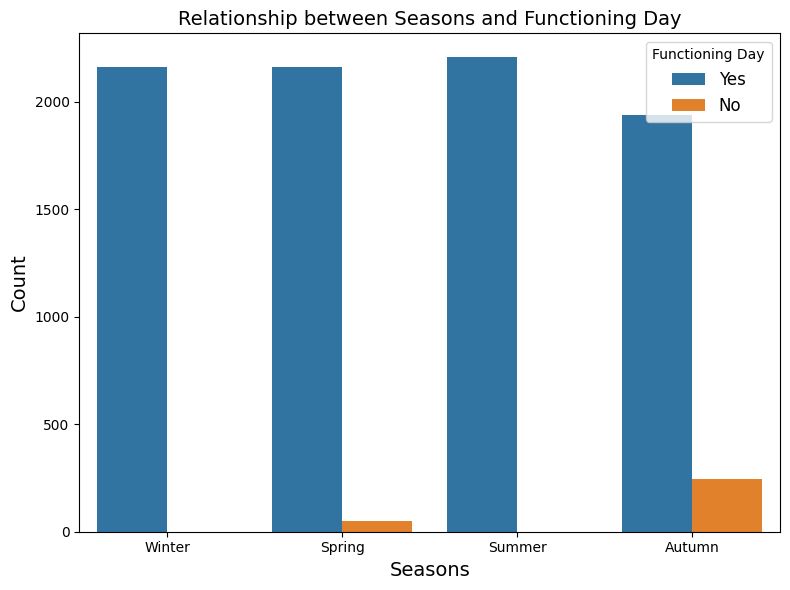

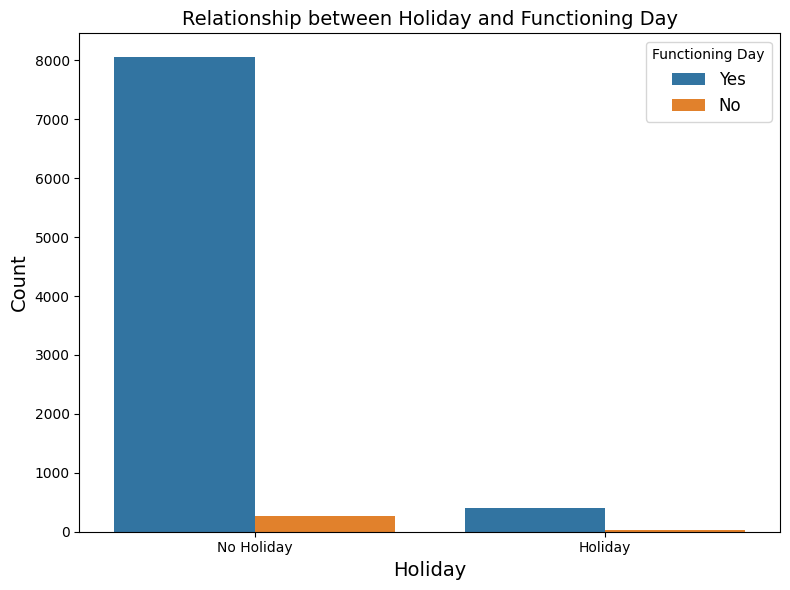

In [ ]:
# Feature-feature (categorical) relationship analysis

for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        feature_x = categorical_features[i]
        feature_y = categorical_features[j]

        plt.figure(figsize=(8, 6))
        sns.countplot(x=feature_x, hue=feature_y, data=X)
        plt.title(f'Relationship between {feature_x} and {feature_y}')
        plt.xlabel(feature_x)
        plt.ylabel('Count')
        plt.legend(title=feature_y)
        plt.tight_layout()
        plt.show()

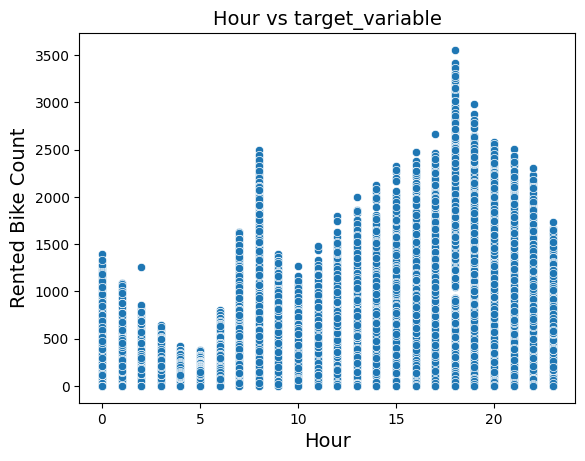

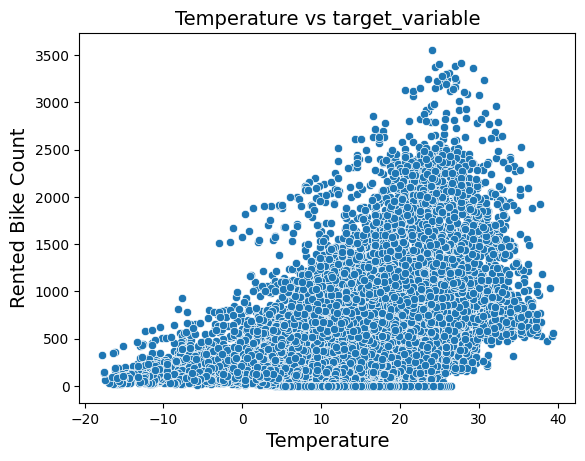

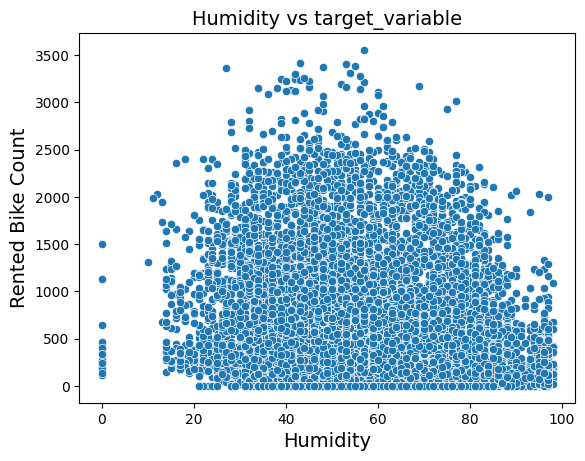

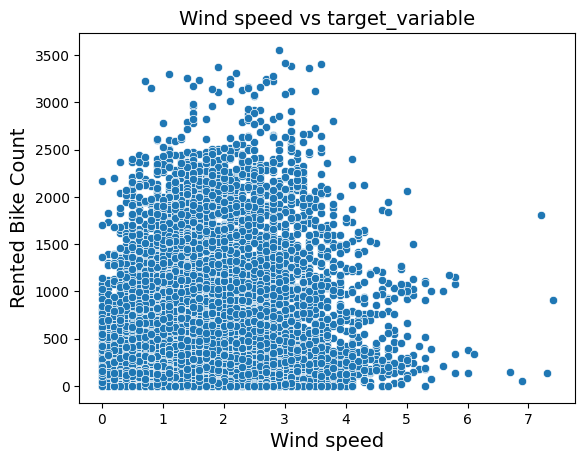

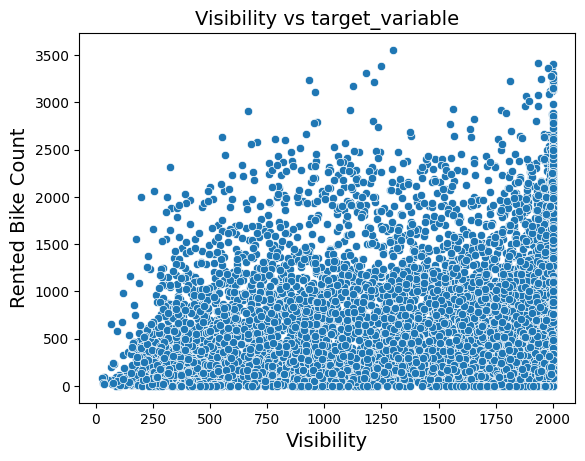

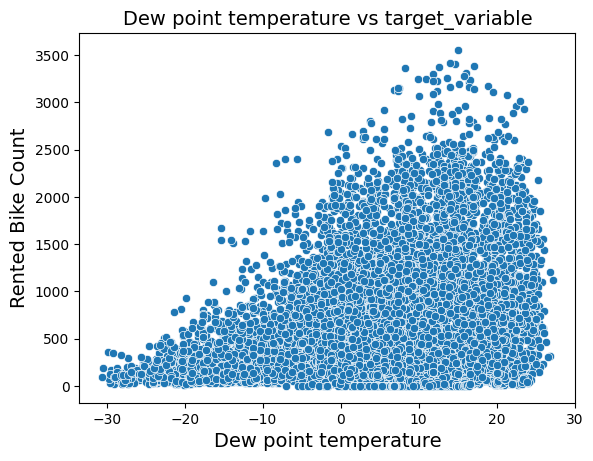

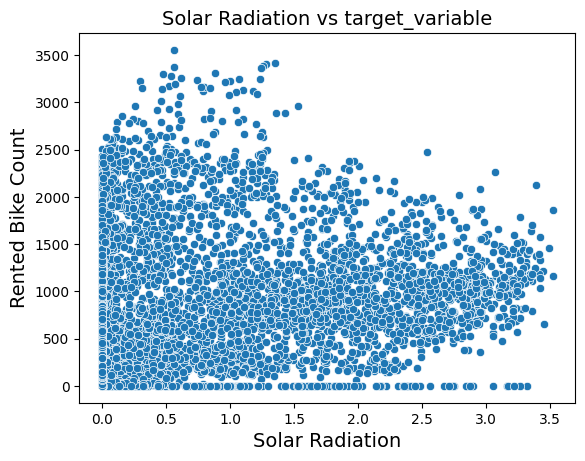

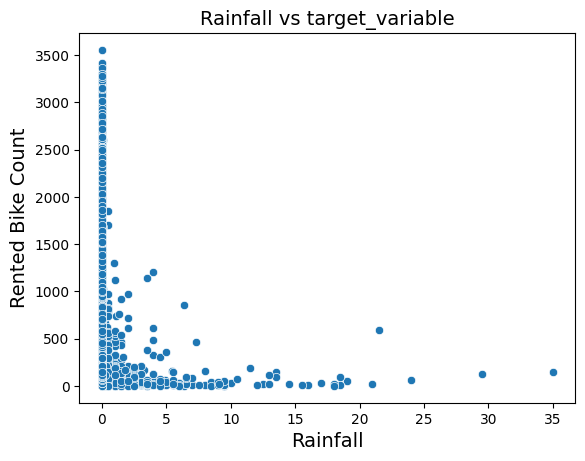

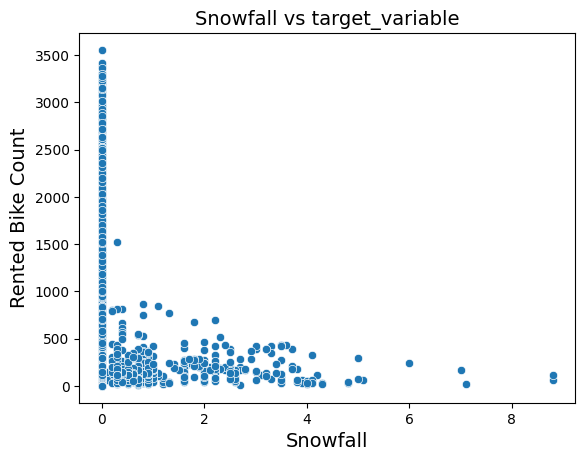

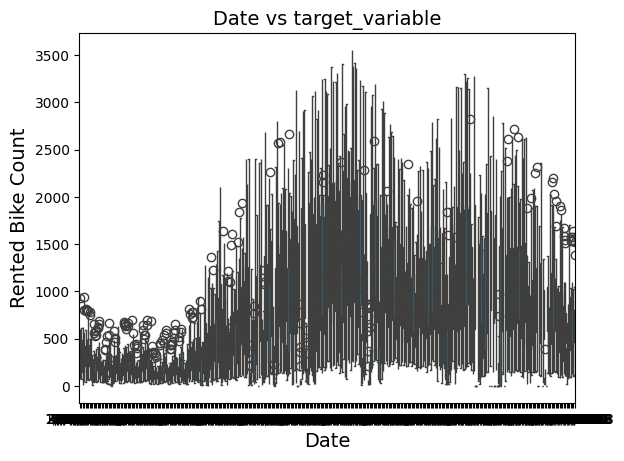

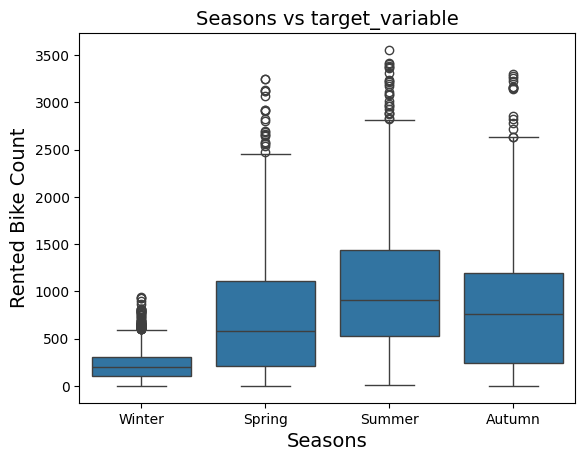

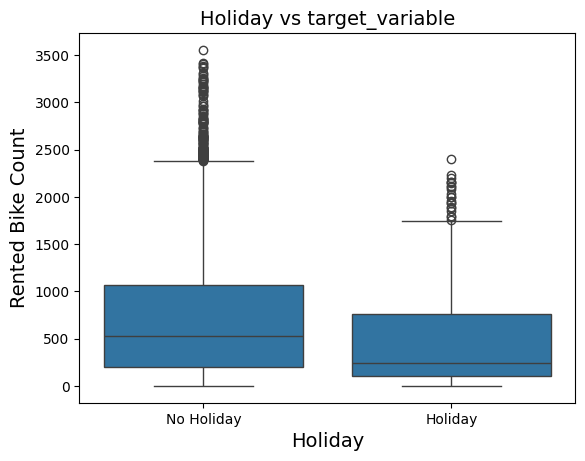

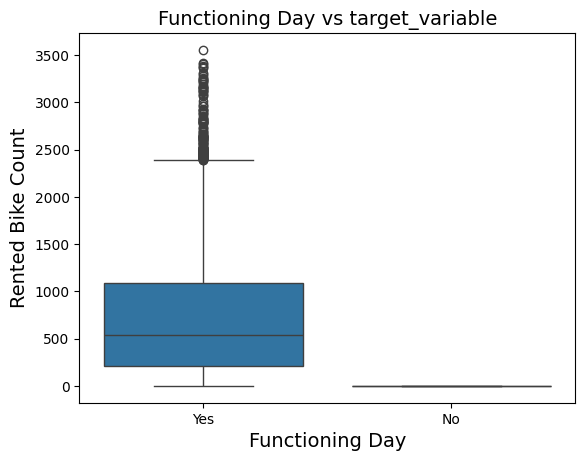

In [ ]:
# Feature-target relationship analysis

def plot_features(df, target=None):
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object', 'category']).columns

    # Plot numerical features
    for col in numerical_features:
        if target:
            sns.scatterplot(x=X[col], y=y)
            plt.title(f"{col} vs {target}")
        else:
            sns.histplot(X[col], kde=True)
            plt.title(f"Histogram for {col}")
        plt.show()

    # Plot categorical features
    for col in categorical_features:
        if target:
            sns.boxplot(x=X[col], y=y)
            plt.title(f"{col} vs {target}")
        else:
            sns.countplot(x=X[col])
            plt.title(f"Count Plot for {col}")
        plt.show()

plot_features(X, target='target_variable')

## 4. Data Preprocessing

From the exploration and visualization of the data in part 3, some steps need to be taken to preprocess the data to ensure the consistency. The following steps will be taken:

(i) Split data into train and test sets

(ii) Creating new features from existing features: `Feels Like Temperature`, `Precipitation Indicator`, `Cloudiness Proxy`, `Day of Week`

(iii) Transforming categorical features (`Seasons`, `Holiday`, `Functional Day`) to binary and one-hot vectors.

(iv) Transform cyclic feature `Hour` to sine and cosine values.


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder, StandardScaler, KBinsDiscretizer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector as selector
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE, SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
# Split data to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Adding new features

def add_new_features(X):
    X = X.copy()

    # Feels Like Temperature = Temperature - ((100 - Humidity) / 5)
    X['Feels Like Temperature'] = X['Temperature'] - ((100 - X['Humidity']) / 5)

    # Precipitation Indicator = 1 if Rainfall or Snowfall > 0, else 0
    X['Precipitation Indicator'] = ((X['Rainfall'] > 0) | (X['Snowfall'] > 0)).astype(int)

    # Cloudiness Proxy = 1 - (Solar Radiation / max Solar Radiation)
    X['Cloudiness Proxy'] = 1 - (X['Solar Radiation'] / X['Solar Radiation'].max())

    return X

In [ ]:
# Identify binarized features (e.g., 'Holiday/No Holiday')
binarized_features = [col for col in categorical_features if X[col].nunique() == 2]

# Identify one-hot encoded features (e.g., 'Seasons', 'Day of the Week')
onehot_features = [col for col in categorical_features if X[col].nunique() > 2]

# Transform binary & one-hot features
binary_transformer = FunctionTransformer(lambda df: df.apply(lambda col: col.map({'Yes': 1, 'No': 0})))
one_hot_transformer = OneHotEncoder(sparse_output=False, drop='first')

In [ ]:
# Function to add sine and cosine features for 'Hour' and drop the original 'Hour'
def add_hour_cyclic(X):
    X = X.copy()
    X['Hour Sine'] = np.sin(2 * np.pi * X['Hour'] / 24)
    X['Hour Cosine'] = np.cos(2 * np.pi * X['Hour'] / 24)
    return X.drop('Hour', axis=1)


# Function to extract 'Day of Week' from 'Date'
def extract_day_of_week(X):
    X = X.copy()
    X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y')
    X['Day of Week'] = X['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
    return X.drop('Date', axis=1)

In [ ]:
# Function to handle infinite values by replacing them with large values
def handle_infinite_values(X):
    X = X.copy()
    X[np.isinf(X)] = np.nan  # Replace Inf with NaN
    return X

Preprocessing pipelines for both the features and target variable are made to ensure systematic transformation and prevent data leakage.

In [ ]:
# Pipeline for features

# Numerical pipeline
numerical_pipeline = Pipeline([
    ('handle_infinite', FunctionTransformer(handle_infinite_values)),
    ('new_features', FunctionTransformer(add_new_features)),
    ('scaler', StandardScaler()),
    ('binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')),
    ('pca', PCA(n_components=2))
])

# Binarization pipeline
binary_categories = [['Holiday', 'No Holiday'], ['Yes', 'No']]

binarization_pipeline = Pipeline([
    ('binarizer', OrdinalEncoder(categories=binary_categories))
])

# One-hot encoding pipeline
onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Custom processing for Hour and Date
custom_pipeline = Pipeline([
    ('hour_features', FunctionTransformer(add_hour_cyclic)),  # Add sine and cosine for Hour
    ('date_features', FunctionTransformer(extract_day_of_week))    # Extract Day_of_Week from Date
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('custom', custom_pipeline, ['Hour', 'Date']),
    ('num', numerical_pipeline, numerical_features),
    ('bin', binarization_pipeline, binarized_features),
    ('cat', onehot_pipeline, onehot_features)
])

# Apply the pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 6 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 7 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 8 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:306

In [ ]:
# Pipeline for the target variable
target_scaling_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Scaling the target
])

y_train_scaled = target_scaling_pipeline.fit_transform(y_train.values.reshape(-1, 1))
y_train_scaled = y_train_scaled.ravel()

2 feature selection methods were used: the filter method and the embedded method with L1 regularization, to select the top 10 relevant features. The model performance for with and without feature selection will be covered in the next section.

In [ ]:
# Define the feature selection methods

# Filter method
def mutual_info_selector(X, y, k=10):
    mi = SelectKBest(mutual_info_regression, k=k)
    return mi.fit_transform(X, y)

# Embedded method with L1 regularization
def lasso_selector(X, y, alpha=0.01):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    return X[:, lasso.coef_ != 0]  # Only select features with non-zero coefficients

## 5. Baseline Model

### 5.1 Selecting the Baseline Models

The baseline models chosen are Linear Regression, Random Forest Regressor, KNN Regressor, SVR, and MLP Regressor. The purposes of the models are:

(i) Linear Regression
* performs the best if the relationship between features and rental bike counts is linear
* simple and intepretable

(ii) Random Forest Regressor
* can capture complex patterns
* robust to outliers

(iii) KNN Regressor
* simple and interpretable non-linear model
* does not assume any underlying relationship between features and target

(iv) SVR
* Flexible in modeling non-linear relationships

(v) MLP Regressor
* Useful for highly non-linear problems

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [ ]:
models = {
    'Linear Regression': LinearRegression(fit_intercept=False),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=10, weights='distance', metric='manhattan'),
    'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
    'MLP Regressor': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

### 5.2 Evaluating Performance

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Dictionary to store evaluation results
model_performance = {
    'No Feature Selection': {},
    'Feature Selection (Mutual Information)': {},
    'Feature Selection (Lasso)': {}
}

In [ ]:
# Without feature selection

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, val_index in kf.split(X_train_preprocessed):
        X_train_cv, X_val_cv = X_train_preprocessed[train_index], X_train_preprocessed[val_index]
        y_train_cv, y_val_cv = y_train_scaled[train_index], y_train_scaled[val_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_val_cv)

        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred_cv))
        mae = mean_absolute_error(y_val_cv, y_pred_cv)
        r2 = r2_score(y_val_cv, y_pred_cv)

        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    model_performance['No Feature Selection'][model_name] = {
        'RMSE': np.mean(rmse_scores),
        'MAE': np.mean(mae_scores),
        'R²': np.mean(r2_scores)
    }

    print(f"RMSE (CV): {np.mean(rmse_scores):.4f} (± {np.std(rmse_scores):.4f})")
    print(f"MAE (CV): {np.mean(mae_scores):.4f} (± {np.std(mae_scores):.4f})")
    print(f"R² (CV): {np.mean(r2_scores):.4f} (± {np.std(r2_scores):.4f})")


Evaluating Linear Regression...
RMSE (CV): 0.6258 (± 0.0097)
MAE (CV): 0.4777 (± 0.0096)
R² (CV): 0.6080 (± 0.0107)

Evaluating Random Forest Regressor...
RMSE (CV): 0.4191 (± 0.0070)
MAE (CV): 0.2675 (± 0.0039)
R² (CV): 0.8240 (± 0.0092)

Evaluating KNN Regressor...
RMSE (CV): 0.4491 (± 0.0095)
MAE (CV): 0.2909 (± 0.0043)
R² (CV): 0.7980 (± 0.0085)

Evaluating SVR...
RMSE (CV): 0.4604 (± 0.0146)
MAE (CV): 0.2924 (± 0.0073)
R² (CV): 0.7878 (± 0.0092)

Evaluating MLP Regressor...
RMSE (CV): 0.2848 (± 0.0081)
MAE (CV): 0.1848 (± 0.0048)
R² (CV): 0.9187 (± 0.0053)


In [ ]:
# With feature selection

# Dictionary for feature selection methods
feature_selection_methods = {
    'Mutual Information': mutual_info_selector,
    'Lasso': lasso_selector
}

for feature_method_name, feature_method in feature_selection_methods.items():
    print(f"\nEvaluating models with {feature_method_name} feature selection:")

    for model_name, model in models.items():
        print(f"\nEvaluating {model_name} with {feature_method_name} feature selection:")

        X_selected = feature_method(X_train_preprocessed, y_train)
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        rmse_scores = []
        mae_scores = []
        r2_scores = []

        for train_index, test_index in kf.split(X_selected):
            X_train_fold, X_test_fold = X_selected[train_index], X_selected[test_index]
            y_train_fold, y_test_fold = y_train_scaled[train_index], y_train_scaled[test_index]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_test_fold)

            rmse = np.sqrt(mean_squared_error(y_test_fold, y_pred))
            mae = mean_absolute_error(y_test_fold, y_pred)
            r2 = r2_score(y_test_fold, y_pred)

            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)

        model_performance[f'Feature Selection ({feature_method_name})'][model_name] = {
            'RMSE': np.mean(rmse_scores),
            'MAE': np.mean(mae_scores),
            'R²': np.mean(r2_scores)
        }

        print(f"RMSE: {np.mean(rmse_scores):.4f} (± {np.std(rmse_scores):.4f})")
        print(f"MAE: {np.mean(mae_scores):.4f} (± {np.std(mae_scores):.4f})")
        print(f"R²: {np.mean(r2_scores):.4f} (± {np.std(r2_scores):.4f})")
        print("-" * 50)


Evaluating models with Mutual Information feature selection:

Evaluating Linear Regression with Mutual Information feature selection:
RMSE: 0.6989 (± 0.0096)
MAE: 0.5173 (± 0.0064)
R²: 0.5112 (± 0.0067)
--------------------------------------------------

Evaluating Random Forest Regressor with Mutual Information feature selection:
RMSE: 0.4210 (± 0.0092)
MAE: 0.2686 (± 0.0054)
R²: 0.8225 (± 0.0087)
--------------------------------------------------

Evaluating KNN Regressor with Mutual Information feature selection:
RMSE: 0.4626 (± 0.0086)
MAE: 0.3022 (± 0.0062)
R²: 0.7858 (± 0.0040)
--------------------------------------------------

Evaluating SVR with Mutual Information feature selection:
RMSE: 0.5099 (± 0.0147)
MAE: 0.3296 (± 0.0091)
R²: 0.7398 (± 0.0113)
--------------------------------------------------

Evaluating MLP Regressor with Mutual Information feature selection:
RMSE: 0.4344 (± 0.0161)
MAE: 0.2839 (± 0.0066)
R²: 0.8110 (± 0.0121)
----------------------------------------

Based on the results above, several general inferences can be made.

(i) Linear regression performed the worst out of all the models, regardless of feature selection. This implies that the relationship between rental bike count and the various features is a more complexed non-linear relationship.

(ii) KNN regressor and SVR provide intermediate performance, but are not the best performing. It seems to be able to handle some non-linearity, but not as effectively as MLP Regressor and Random Forest.

(iii) MLP Regressor excels for all evaluation metrics, likely due to its ability to capture complex patterns in the data.

(iv) Random Forest Regressor is an alternative that performed rather well and provides interpretability.

(v) Among the 2 feature selection methods, the Lasso method enhances the performance of all models compared to the Mutual Information method. This is likely due to Lasso's ability to prevent overfitting and encourage sparse solutions to make the model simpler.

In [ ]:
# Select top models based on RMSE

def select_top_models(performance_data, metric='RMSE', top_n=2):
    sorted_models = sorted(performance_data.items(), key=lambda x: x[1][metric])
    top_models = sorted_models[:top_n]
    return top_models

# Top 3 models without feature selection
top_models_no_fs = select_top_models(model_performance['No Feature Selection'], metric='RMSE', top_n=3)
print("\nTop 3 models without feature selection (based on RMSE):")
for model_name, scores in top_models_no_fs:
    print(f"{model_name}: RMSE = {scores['RMSE']:.4f}")

# Top 3 models with mutual information feature selection
top_models_mi = select_top_models(model_performance['Feature Selection (Mutual Information)'], metric='RMSE', top_n=3)
print("\nTop 3 models with Mutual Information feature selection (based on RMSE):")
for model_name, scores in top_models_mi:
    print(f"{model_name}: RMSE = {scores['RMSE']:.4f}")

# Top 3 models with Lasso feature selection
top_models_lasso = select_top_models(model_performance['Feature Selection (Lasso)'], metric='RMSE', top_n=3)
print("\nTop 3 models with Lasso feature selection (based on RMSE):")
for model_name, scores in top_models_lasso:
    print(f"{model_name}: RMSE = {scores['RMSE']:.4f}")


Top 3 models without feature selection (based on RMSE):
MLP Regressor: RMSE = 0.2848
Random Forest Regressor: RMSE = 0.4191
KNN Regressor: RMSE = 0.4491

Top 3 models with Mutual Information feature selection (based on RMSE):
Random Forest Regressor: RMSE = 0.4210
MLP Regressor: RMSE = 0.4344
KNN Regressor: RMSE = 0.4626

Top 3 models with Lasso feature selection (based on RMSE):
MLP Regressor: RMSE = 0.2851
Random Forest Regressor: RMSE = 0.4191
KNN Regressor: RMSE = 0.4486


From the restuls above, it can be seen that minimum RMSE is achieved for each model when:

MLP Regressor, without feature selection: `RMSE = 0.2848`

Random Forest Regressor, without feature selection, or with Lasso: `RMSE = 0.4191`

KNN Regressor, with Lasso: `RMSE = 0.4486`



## 6. Hyperparameter Tuning & Final Model Selection

### 6.1 Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
selected_top_models = {
    'No Feature Selection': top_models_no_fs,
    'Feature Selection (Mutual Information)': top_models_mi,
    'Feature Selection (Lasso)': top_models_lasso
}

param_distributions = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'normalize': [True, False]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'KNN Regressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    },
    'SVR': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']
    },
    'MLP Regressor': {
        'hidden_layer_sizes': [(50,), (100,), (100, 100)],
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Set to store unique models across all feature selection types
unique_models = set()

# Populate the set with model names from all top models
for selection_type, top_models in selected_top_models.items():
    for model_name, _ in top_models:
        unique_models.add(model_name)

# Perform random search only once per model
final_best_models = {}

for model_name in unique_models:
    print(f"\nPerforming random search for {model_name}...")

    # Get the selection types for the current model
    model_selection_types = [selection_type for selection_type, top_models in selected_top_models.items()
                             if any(model_name == m[0] for m in top_models)]

    print(f"Model '{model_name}' appears in the following selection types: {', '.join(model_selection_types)}")

    model = models[model_name]
    param_dist = param_distributions[model_name]

    random_search = RandomizedSearchCV(
        model,
        param_distributions=param_dist,
        n_iter=10,  # Number of random combinations to try
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    # Perform the random search on the training data
    random_search.fit(X_train_preprocessed, y_train)

    # Store the best estimator and associated metadata in a dictionary
    final_best_models[model_name] = {
        'best_estimator': random_search.best_estimator_,
        'best_score': random_search.best_score_,
        'best_params': random_search.best_params_
    }

    print(f"Best hyperparameters for {model_name}: {random_search.best_params_}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")



Performing random search for MLP Regressor...
Model 'MLP Regressor' appears in the following selection types: No Feature Selection, Feature Selection (Mutual Information), Feature Selection (Lasso)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 754, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local

Best hyperparameters for MLP Regressor: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.0001, 'activation': 'relu'}
Best cross-validation score: 0.9519

Performing random search for KNN Regressor...
Model 'KNN Regressor' appears in the following selection types: No Feature Selection, Feature Selection (Mutual Information), Feature Selection (Lasso)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for KNN Regressor: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'manhattan'}
Best cross-validation score: 0.7928

Performing random search for Random Forest Regressor...
Model 'Random Forest Regressor' appears in the following selection types: No Feature Selection, Feature Selection (Mutual Information), Feature Selection (Lasso)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for Random Forest Regressor: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'ma

From the results above, MLP Regressor achieved the best CV score of `0.9519` with hyperparameters `{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.0001, 'activation': 'relu'}`. In particular, the Adam solver, adaptive learning rate, and ReLU activation function, align with common best practices for deep learning models. Hence, this indicates a good choice of hyperparameters for the final model.

On top of that, since the best performing model when comparing the effects of feature selection was also MLP Regressor (without feature selection), the model was chosen as the final model with the hyperparameters above.

### 6.2 Final Model Selection

In [ ]:
# Find the model (MLP Regressor) with the best CV score
best_model_entry = max(final_best_models.items(), key=lambda item: item[1]['best_score'])

best_model_name = best_model_entry[0]
best_model_data = best_model_entry[1]
best_model = best_model_data['best_estimator']

print(f"\nModel with the best CV score: {best_model_name}")
print(f"Best CV Score: {best_model_data['best_score']:.4f}")
print(f"Best Hyperparameters: {best_model_data['best_params']}")
print()

y_pred_scaled = best_model.predict(X_test_preprocessed)
y_pred_original = target_scaling_pipeline.inverse_transform(y_pred_scaled.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))
mae = mean_absolute_error(y_test, y_pred_original)
r2 = r2_score(y_test, y_pred_original)

print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R-squared: {r2:.4f}")


Model with the best CV score: MLP Regressor
Best CV Score: 0.9519
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.0001, 'activation': 'relu'}

Test RMSE: 614683.5829
Test MAE: 456453.3745
Test R-squared: -906849.6396


Based on the results above, several inferences can be made regarding the final model:

(i) Despite the high CV score of `0.9519`, the performance of the model on the test set is poor, with a very high RMSE, MAE, and a negative R². This implies that the model is overfit, and fails to generalize on unseen data in the test set.

(ii) Although the data was preprocessed, issues with the training data may have affected the model's performance. For example, inconsistent feature scaling or unbalanced data might affect generalization.

(iii) There may have been a mismatch in data distribution, or noise in the test set.

In order to overcome these issues, the following improvements should be considered:

(i) Using regularization methods such as L2 regularization can help prevent overfitting.

(ii) Additional preprocessing such as proper feature scaling can be experimented to improve the model's performance.

(iii) Stratified K-fold cross-validation can be considered to ensure a representative split.

# References:

V E, S., & Cho, Y. (2020). A rule-based model for Seoul bike sharing demand prediction using weather data. European Journal of Remote Sensing, 53(sup1), 166–183. https://doi.org/10.1080/22797254.2020.1725789

This report contains generated portions from ChatGPT (GPT-4o and GPT-4o mini versions, OpenAI,  https://chatgpt.com/) that have been paraphrased. This includes:

* how machine learning can be used to address the objectives
* how to generate new features from existing features
* what types of baseline models will be suitable for the task
* what possible reasons cause high RMSE and MAE values, and negative R²

